# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>

# Question 1: Ensembles Conceptual
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

## Answer:
It's a kind of method by which the weak learners can be converted into a strong learners. In boosting, algorithms correct and change the original data by imposing weights on the observations that are difficult to predict. 

While the Adaboost imposes higher weights to the observations based on the results of a decision trees, Gradient Boosting tries to look at the loss function and its gradients to adjust weights in question

# Question 2: SVM 
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

a) Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

b) The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

c) The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

# Answer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

In [2]:
def plot_model(X, y, svc, kernel='linear'):
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'

    x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = (x0_max / x0_min)/100
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

    plt.subplot(1, 1, 1)
    y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
    y_pred = y_pred.reshape(xx0.shape)
    plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.xlim(xx0.min(), xx0.max())
    plt.title('SVC with {} kernel'.format(kernel))
    plt.show()

In [3]:
def train_model(X, y, kernel='linear', C=1, gamma=0.5):
    svc = make_pipeline(StandardScaler(), SVC(kernel=kernel, C=1,gamma=gamma))
    svc.fit(X, y)
    return svc

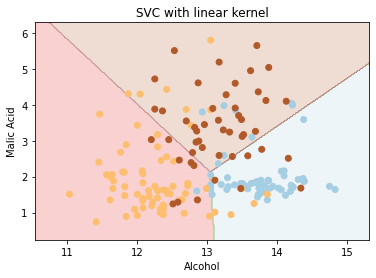

In [4]:
svc = train_model(X, y, kernel='linear', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='linear')

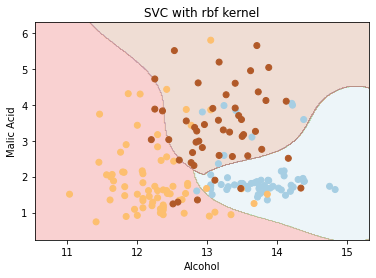

In [5]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='rbf')

Using rbf as a kernel brought non-linear decision boundary

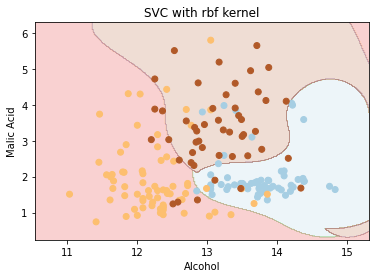

In [6]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=1)
plot_model(X, y, svc, kernel='rbf')

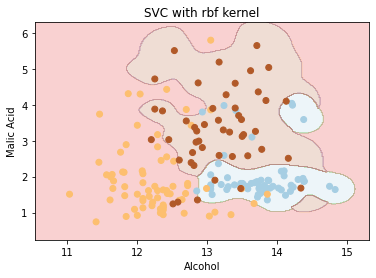

In [7]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=10)
plot_model(X, y, svc, kernel='rbf')

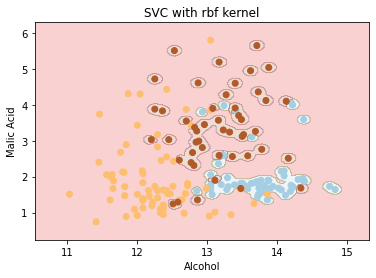

In [8]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=100)
plot_model(X, y, svc, kernel='rbf')

As I increased the gamma value, it seems to fit better, but this can cause the over-fitting as it tries to match all the systematic errors

# Question 3: Ensemble methods for classification

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

a) Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


b) For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


cc) Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


d) Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

e) In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


## (a) Decision Tree

In [10]:
clf_dt = DecisionTreeClassifier(random_state=10)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
y_score_dt = clf_dt.predict_proba(X_test)[:, 1]
accuracy_score(y_test, y_pred_dt)

0.9098090849242922

In [11]:
roc_auc_score(y_test, y_score_dt)

0.9040453749567611

## (a) Logistic Regression

In [12]:
clf_lr = LogisticRegression(random_state=10, solver='newton-cg').fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
y_score_lr = clf_lr.predict_proba(X_test)[:, 1]

In [13]:
print(accuracy_score(y_test, y_pred_lr))
print(roc_auc_score(y_test, y_score_lr))

0.9315339038841343
0.9734682742610166


## (b)

As the result of adopting bagging on both classifiers, both the accuracy scores and roc_auc scores have been increased. For the case of decision tree, the accuracy score has been increased around 3 percent. roc_auc score has been increased over 7 percent.

In case of the bagging logistic regression, accuracy and roc remain similar, while showing some advances

In [14]:
clf_bag_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        n_estimators=50, random_state=10).fit(X_train, y_train)
y_pred_bag_dt = clf_bag_dt.predict(X_test)
y_score_bag_dt = clf_bag_dt.predict_proba(X_test)[:, 1]

In [15]:
print(accuracy_score(y_test, y_pred_bag_dt))
print(roc_auc_score(y_test, y_score_bag_dt))

0.9368005266622779
0.9796839729119637


In [16]:
clf_bag_lr = BaggingClassifier(base_estimator=LogisticRegression(solver='newton-cg'),
                        n_estimators=50, random_state=10).fit(X_train, y_train)
y_pred_bag_lr = clf_bag_lr.predict(X_test)
y_score_bag_lr = clf_bag_lr.predict_proba(X_test)[:, 1]

In [17]:
print(accuracy_score(y_test, y_pred_bag_lr))
print(roc_auc_score(y_test, y_score_bag_lr))

0.934167215273206
0.97552769248874


## (c)

In [18]:
parameters = {"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}
RF = RandomForestClassifier()
clf_RF = GridSearchCV(RF, parameters).fit(X_train, y_train)
y_pred_RF=clf_RF.predict(X_test)

In [19]:
def best_param(clf):
    
    tmp = pd.concat([pd.DataFrame(clf.cv_results_["params"]),
                    pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
    df = tmp.sort_values(by=['Accuracy'], ascending=False)
    
    return df

In [20]:
best_param(clf_RF)[:1]

,criterion,n_estimators,random_state,Accuracy
2,gini,500,42,0.949063


In [21]:
print(accuracy_score(y_test, y_pred_RF))
print(roc_auc_score(y_test, clf_RF.predict_proba(X_test)[:,1]))

0.9552337063857801
0.9891234188838844


## (d)

In [22]:
parameters_gb = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], 
                 "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}

GB = GradientBoostingClassifier()
clf_GB = GridSearchCV(GB, parameters_gb)
clf_GB.fit(X_train, y_train)
y_pred_GB=clf_GB.predict(X_test)

In [23]:
best_param(clf_GB)[:1]

,learning_rate,max_depth,n_estimators,random_state,subsample,Accuracy
35,0.1,3,500,42,1.0,0.950038


In [24]:
print(accuracy_score(y_test, y_pred_GB))
print(roc_auc_score(y_test, clf_GB.predict_proba(X_test)[:,1]))

0.9552337063857801
0.9889094533537314


In [26]:
parameters_ab = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}

AB = GradientBoostingClassifier()
clf_AB = GridSearchCV(AB, parameters_ab)
clf_AB.fit(X_train, y_train)
y_pred_AB=clf_AB.predict(X_test)

In [27]:
print(accuracy_score(y_test, y_pred_AB))
print(roc_auc_score(y_test, clf_AB.predict_proba(X_test)[:,1]))

0.9552337063857801
0.9889094533537314


In [28]:
best_param(clf_AB)[:1]

,learning_rate,n_estimators,random_state,Accuracy
5,0.1,500,42,0.950038


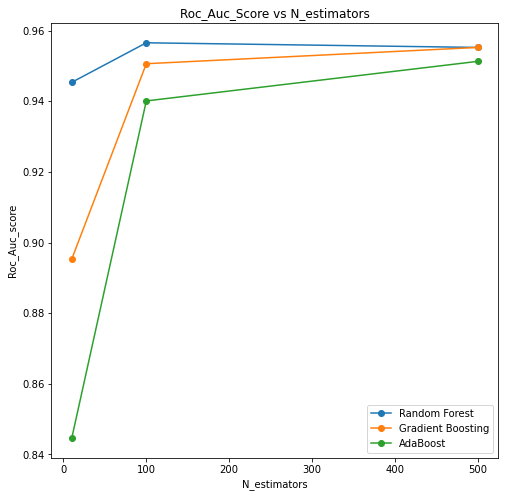

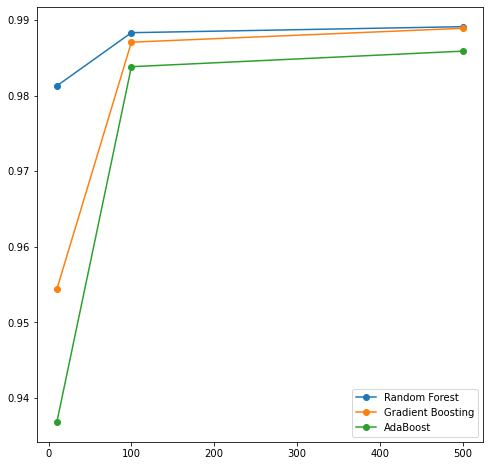

In [29]:
n_estimators = [10, 100, 500]
acc_rf_lst = []
roc_rf_lst = []
acc_gb_lst = []
roc_gb_lst = []
acc_ab_lst = []
roc_ab_lst = []

for i in n_estimators:
    clf_rf = RandomForestClassifier(n_estimators=i, criterion='gini', random_state=42).fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_test)
    y_pred_rf1 = clf_rf.predict_proba(X_test)[:, 1]
    acc_rf = accuracy_score(y_test, y_pred_rf)
    roc_rf = roc_auc_score(y_test, y_pred_rf1)
    acc_rf_lst.append(acc_rf)
    roc_rf_lst.append(roc_rf)
    
    clf_gb = GradientBoostingClassifier(n_estimators=i, learning_rate=0.1, max_depth=3, subsample=1.0, random_state=42).fit(X_train, y_train)
    y_pred_gb = clf_gb.predict(X_test)
    y_pred_gb1 = clf_gb.predict_proba(X_test)[:, 1]
    acc_gb = accuracy_score(y_test, y_pred_gb)
    roc_gb = roc_auc_score(y_test, y_pred_gb1)
    acc_gb_lst.append(acc_gb)
    roc_gb_lst.append(roc_gb)
    
    clf_ab = AdaBoostClassifier(n_estimators=i, learning_rate=0.1, random_state=42).fit(X_train, y_train)
    y_pred_ab = clf_ab.predict(X_test)
    y_pred_ab1 = clf_ab.predict_proba(X_test)[:, 1]
    acc_ab = accuracy_score(y_test, y_pred_ab)
    roc_ab = roc_auc_score(y_test, y_pred_ab1)
    acc_ab_lst.append(acc_ab)
    roc_ab_lst.append(roc_ab)


fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(n_estimators, acc_rf_lst, marker='o', label='Random Forest')
ax.plot(n_estimators, acc_gb_lst, marker='o', label='Gradient Boosting')
ax.plot(n_estimators, acc_ab_lst, marker='o', label='AdaBoost')
ax.set_xlabel('N_estimators')
ax.set_ylabel('Accuracy Score')
ax.set_title('Accuracy Score vs N_estimators')
ax.legend()

fig1, ax1 = plt.subplots(1, 1, figsize=(8,8))
ax1.plot(n_estimators, roc_rf_lst, marker='o', label='Random Forest')
ax1.plot(n_estimators, roc_gb_lst, marker='o', label='Gradient Boosting')
ax1.plot(n_estimators, roc_ab_lst, marker='o', label='AdaBoost')
ax.set_xlabel('N_estimators')
ax.set_ylabel('Roc_Auc_score')
ax.set_title('Roc_Auc_Score vs N_estimators')
ax1.legend()